In [8]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [9]:
train_samples = []
train_labels = []

In [10]:
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1) 

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [11]:
train_labels_np = np.array(train_labels)
train_samples_np = np.array(train_samples)
train_labels_np, train_samples_np = shuffle(train_labels_np, train_samples_np)

In [12]:
print(train_labels_np)
print(train_samples_np)
print(train_samples_np.reshape(-1,1))
print(len(train_labels_np))
print(len(train_samples_np))

[1 0 1 ... 1 0 1]
[82 69 95 ... 81 56 77]
[[82]
 [69]
 [95]
 ...
 [81]
 [56]
 [77]]
2100
2100


In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples_np.reshape(-1, 1))

In [14]:
print(scaled_train_samples)

[[0.79310345]
 [0.64367816]
 [0.94252874]
 ...
 [0.7816092 ]
 [0.49425287]
 [0.73563218]]


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [16]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.fit(x=scaled_train_samples, y=train_labels_np, validation_split=0.2, batch_size=10,  epochs=20, shuffle=True, verbose=2)

Train on 1680 samples, validate on 420 samples
Epoch 1/20
 - 0s - loss: 0.7123 - accuracy: 0.4310 - val_loss: 0.6939 - val_accuracy: 0.5143
Epoch 2/20
 - 0s - loss: 0.6796 - accuracy: 0.5226 - val_loss: 0.6632 - val_accuracy: 0.5786
Epoch 3/20
 - 0s - loss: 0.6496 - accuracy: 0.6357 - val_loss: 0.6302 - val_accuracy: 0.6810
Epoch 4/20
 - 0s - loss: 0.6178 - accuracy: 0.7173 - val_loss: 0.6012 - val_accuracy: 0.7095
Epoch 5/20
 - 0s - loss: 0.5902 - accuracy: 0.7470 - val_loss: 0.5743 - val_accuracy: 0.7429
Epoch 6/20
 - 0s - loss: 0.5630 - accuracy: 0.7762 - val_loss: 0.5475 - val_accuracy: 0.7762
Epoch 7/20
 - 0s - loss: 0.5360 - accuracy: 0.7905 - val_loss: 0.5211 - val_accuracy: 0.8000
Epoch 8/20
 - 0s - loss: 0.5097 - accuracy: 0.8137 - val_loss: 0.4958 - val_accuracy: 0.8190
Epoch 9/20
 - 0s - loss: 0.4840 - accuracy: 0.8369 - val_loss: 0.4712 - val_accuracy: 0.8357
Epoch 10/20
 - 0s - loss: 0.4594 - accuracy: 0.8446 - val_loss: 0.4474 - val_accuracy: 0.8643
Epoch 11/20
 - 0s - lo

In [19]:
test_labels = []
test_samples = []

for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))
print(test_samples)

[ 34 100  35  83  51  67  57  87  49  76  18  68  61  99  50  72  32 100
  29  82  59  90  60  93  49  78  52  86  33  76  51  77  17  88  36  65
  40  83  33  84  18  79  53  90  30  92  17  84  29  99  13  79  13  87
  55  93  61  73  15  81  50  87  40 100  54  89  50  70  61  72  36  69
  29  92  46  82  34 100  53  76  40  92  51  77  19  73  21  98  29  65
  48  75  16  92  44  71  50  69  14  81  34  96  60  85  40  72  29  82
  40  98  25  71  36  89  60  80  22 100  57  92  32  72  35  94  49  66
  61  90  26  94  41  92  16  91  41  78  45  83  16  84  19  95  47  96
  29  70  42  80  14  78  58  73  21 100  59  85  55  96  39  83  53  86
  18  67  25  98  46  74  26  99  23  88  27  75  46  69  31  65  49  69
  41  82  51  69  54  77  31  69  27  87  27  66  54  95  34  75  37  70
  58  96  51  92  23  94  43  67  27  65  51  89  43  69  25  73  22  86
  62  80  23  81  46  72  58  73  57  98  36  82  54  91  37  76  54  67
  19  92  54  91  14  89  60  81  25  74  55  80  3

In [20]:
scaled_test_samples

array([[0.24137931],
       [1.        ],
       [0.25287356],
       [0.8045977 ],
       [0.43678161],
       [0.62068966],
       [0.50574713],
       [0.85057471],
       [0.4137931 ],
       [0.72413793],
       [0.05747126],
       [0.63218391],
       [0.55172414],
       [0.98850575],
       [0.42528736],
       [0.67816092],
       [0.2183908 ],
       [1.        ],
       [0.18390805],
       [0.79310345],
       [0.52873563],
       [0.88505747],
       [0.54022989],
       [0.91954023],
       [0.4137931 ],
       [0.74712644],
       [0.44827586],
       [0.83908046],
       [0.22988506],
       [0.72413793],
       [0.43678161],
       [0.73563218],
       [0.04597701],
       [0.86206897],
       [0.26436782],
       [0.59770115],
       [0.31034483],
       [0.8045977 ],
       [0.22988506],
       [0.81609195],
       [0.05747126],
       [0.75862069],
       [0.45977011],
       [0.88505747],
       [0.1954023 ],
       [0.90804598],
       [0.04597701],
       [0.816

In [21]:
predictions = model.predict(x=scaled_test_samples, batch_size=10,verbose=0)

In [22]:
for i in predictions:
    print(i)

[0.89308345 0.10691648]
[0.04209413 0.9579059 ]
[0.8875847  0.11241531]
[0.13130808 0.8686919 ]
[0.68900144 0.31099856]
[0.36656216 0.6334378 ]
[0.5724947  0.42750528]
[0.09752297 0.902477  ]
[0.72377425 0.27622578]
[0.21380827 0.78619176]
[0.9083401  0.09165995]
[0.34730724 0.6526928 ]
[0.48910788 0.51089215]
[0.04435072 0.95564926]
[0.7066892  0.29331085]
[0.2755769 0.7244231]
[0.9015458  0.09845416]
[0.04209413 0.9579059 ]
[0.90883845 0.09116158]
[0.14117804 0.858822  ]
[0.5310178  0.46898228]
[0.07750327 0.92249674]
[0.5100806  0.48991945]
[0.06197108 0.93802893]
[0.72377425 0.27622578]
[0.18695363 0.8130464 ]
[0.67074406 0.32925594]
[0.10516099 0.894839  ]
[0.89774567 0.10225436]
[0.21380827 0.78619176]
[0.68900144 0.31099856]
[0.20004316 0.7999568 ]
[0.90793896 0.09206107]
[0.0903838  0.90961623]
[0.8813092  0.11869076]
[0.4063228 0.5936771]
[0.8478281  0.15217194]
[0.13130808 0.8686919 ]
[0.89774567 0.10225436]
[0.12202995 0.87797004]
[0.9083401  0.09165995]
[0.17453368 0.825466

In [23]:
rounded_predictions = model.predict_classes(x=scaled_test_samples, batch_size=10,verbose=0)

In [24]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [25]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [26]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [27]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
cm_plot_lables = ["no_side_effects", "had_side_effects"]

Confusion matrix, without normalization
[[190  20]
 [  9 201]]


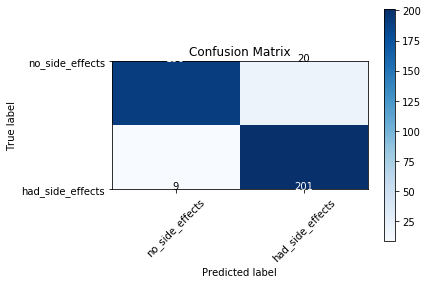

In [29]:
plot_confusion_matrix(cm=cm, classes=cm_plot_lables, title="Confusion Matrix")

In [30]:
model.save("medical_trail_predict.h5")

In [ ]:
from keras import quantized_model
quantized_medical_model = quantized_model(model)
model.save("medical_trail_predict.h5")